# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent_banana import Agent
from collections import namedtuple, deque
import torch
import matplotlib.pyplot as plt
import pandas as pd

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [5]:
env = UnityEnvironment(file_name="Banana.app", worker_id=43, seed=1, no_graphics=True) 

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print("brain_name==",brain_name, "\nbrain==",brain)

brain_name== BananaBrain 
brain== Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
print("agent name==env_info.agents==", env_info.agents)

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

agent name==env_info.agents== [778]
Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.27946243 0.
 1.         0.         0.         0.74556106 0.         0.
 1.         0.         0.48277503 0.         1.         0.
 0.         0.30341193 0.         0.         1.         0.
 0.46494457 0.         0.         1.         0.         0.08466676
 0.         1.         0.         0.         0.95967758 0.
 0.        ]
States have length: 37


### 3. Take "Random Actions" in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [8]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state (type=numpy.ndarray)
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: -4.0


### 4. It's Your Turn! -"Train" your own agent

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [9]:
#Create a DQN_banana agent
agent = Agent(state_size=37, action_size=4, seed=0)

# Train the Agent with DQN

def dqn_banana(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment-specific for banana
        state = env_info.vector_observations[0]           # get the current state (type=numpy.ndarray) -specific for banana\
                                                          # for lunarlander, state = env.reset()
        
        score = 0
        ####################################################################
        ## KEY TRAINING PART
        ####################################################################
        for t in range(max_t):
            action = agent.act(state, eps)                      # select an action
            env_info = env.step(action)[brain_name]             # send the action to the environment -specific for banana
            next_state = env_info.vector_observations[0]        # get the next state -specific for banana
            reward = env_info.rewards[0]                        # get the reward
            done = env_info.local_done[0]                       # see if episode has finished
            agent.step(state, action, reward, next_state, done) # move onto next step
            
            score += reward                                     # update the score
            state = next_state                                  # roll over the state to next time step
            
            if done:                                            # exit loop if episode finished
                break 
        ####################################################################
        ####################################################################

        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon

        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, \
                                                           np.mean(scores_window)), \
                                                           end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        if np.mean(scores_window) > 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))         
            break
            
    return scores

scores = dqn_banana()
print("Done!")

Episode 100	Average Score: 0.95
Episode 200	Average Score: 4.80
Episode 300	Average Score: 8.31
Episode 400	Average Score: 10.45
Episode 500	Average Score: 12.68
Episode 553	Average Score: 13.01
Environment solved in 453 episodes!	Average Score: 13.01
Done!


In [19]:
scores

[1.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 2.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 -2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 -2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 2.0,
 1.0,
 1.0,
 -1.0,
 -2.0,
 2.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 5.0,
 0.0,
 1.0,
 5.0,
 1.0,
 2.0,
 0.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 2.0,
 5.0,
 1.0,
 1.0,
 -1.0,
 2.0,
 0.0,
 3.0,
 6.0,
 3.0,
 4.0,
 2.0,
 1.0,
 0.0,
 1.0,
 2.0,
 7.0,
 2.0,
 3.0,
 4.0,
 0.0,
 3.0,
 4.0,
 5.0,
 1.0,
 2.0,
 4.0,
 1.0,
 6.0,
 4.0,
 6.0,
 2.0,
 8.0,
 3.0,
 4.0,
 7.0,
 5.0,
 1.0,
 8.0,
 5.0,
 0.0,
 6.0,
 1.0,
 2.0,
 2.0,
 7.0,
 1.0,
 5.0,
 -1.0,
 2.0,
 8.0,
 6.0,
 2.0,
 0.0,
 2.0,
 4.0,
 6.0,
 0.0,
 0.0,
 4.0,
 9.0,
 4.0,
 9.0,
 7.0,
 6.0,
 0.0,
 3.0,
 3.0,
 5.0,
 4.0,
 5.0,
 6.0,
 8.0,
 2.0,
 4.0,
 4.0,
 8.0,
 4.0,
 1.0,
 4.0,
 1.0,
 4.0,
 5.0,
 2.0,
 8.0,
 3.0,
 6.0,
 5.0,
 6.0,


In [14]:
## Save the scores for future visit purpose
with open('scores.txt', 'w') as f:
    for score in scores:
        f.write("%s\n" % score)

In [21]:
scores_readFromFile=[]
with open('scores.txt', 'r') as f:
    for score in f:
        print(score+"\n")
        scores_readFromFile.append(score+"\n")
        
print(scores_readFromFile)

1.0


-1.0


0.0


0.0


1.0


2.0


2.0


0.0


1.0


0.0


0.0


-1.0


1.0


-2.0


0.0


0.0


2.0


0.0


-2.0


0.0


0.0


0.0


0.0


1.0


1.0


0.0


1.0


0.0


-1.0


1.0


0.0


1.0


-1.0


0.0


0.0


0.0


1.0


0.0


-1.0


0.0


-1.0


-1.0


1.0


-1.0


1.0


0.0


1.0


2.0


1.0


1.0


-1.0


-2.0


2.0


1.0


1.0


0.0


0.0


1.0


1.0


5.0


0.0


1.0


5.0


1.0


2.0


0.0


2.0


1.0


2.0


2.0


1.0


0.0


-1.0


0.0


-1.0


2.0


5.0


1.0


1.0


-1.0


2.0


0.0


3.0


6.0


3.0


4.0


2.0


1.0


0.0


1.0


2.0


7.0


2.0


3.0


4.0


0.0


3.0


4.0


5.0


1.0


2.0


4.0


1.0


6.0


4.0


6.0


2.0


8.0


3.0


4.0


7.0


5.0


1.0


8.0


5.0


0.0


6.0


1.0


2.0


2.0


7.0


1.0


5.0


-1.0


2.0


8.0


6.0


2.0


0.0


2.0


4.0


6.0


0.0


0.0


4.0


9.0


4.0


9.0


7.0


6.0


0.0


3.0


3.0


5.0


4.0


5.0


6.0


8.0


2.0


4.0


4.0


8.0


4.0


1.0


4.0


1.0


4.0


5.0


2.0


8.0


3.0


6.0


5.0


6.0




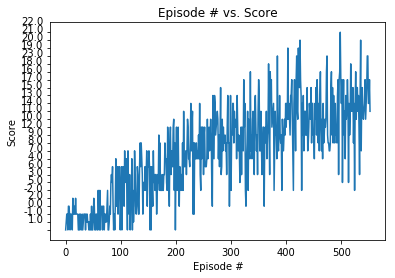

In [22]:
## Plot the scores
## Reviewer #1's suggestion:
# (1) Add A target/goal line showing the score that is required to be met for solving the environment.
# (2) Add The 100-episode average line. 
# Where these two cross indicates the point the environment was solved.

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(len(scores_readFromFile)), scores_readFromFile)
ax.set_ylabel('Score')
ax.set_xlabel('Episode #')
ax.set_title('Episode # vs. Score')

fig.savefig('banana_POR_episode_534_withtitle.jpg')

# 5. Watch a Smart Agent Playing a new game after training!

In [8]:
# load the weights from file
agent = Agent(state_size=37, action_size=4, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment-specific for banana
state = env_info.vector_observations[0]            # get the current state (type=numpy.ndarray)
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]             # send the action to the environment -specific for banana
    next_state = env_info.vector_observations[0]        # get the next state -specific for banana
    reward = env_info.rewards[0]                        # get the reward
    done = env_info.local_done[0]                       # see if episode has finished
    #agent.step(state, action, reward, next_state, done) # move onto next step
            
    score += reward                                     # update the score
    state = next_state                                  # roll over the state to next time step
    if done:
        break 
        
print("Score of trained agent playing a new game : {}".format(score))

Score of trained agent playing a new game : 16.0


When finished, you can close the environment.

In [9]:
#Soyoung's node: NEVER CLOSE when still work is left with the env. \
# Once closed, env instanciation even doesnt work with the message: "handle is closed".
# Once closed, even if jupyter notebook is restarted,  env does't respond by invoking, and\
# and shows the following message:
# " The Unity environment took too long to respond. Make sure that :
# The environment does not need user interaction to launch
# The Academy and the External Brain(s) are attached to objects in the Scene
# The environment and the Python interface have compatible versions."
# Once closed and want to rerun this jn, all you can do is restart the whole laptop.

env.close()